# Prophet Model from Facebook to Be use in the time series analysis

[image_0]: https://pfst.cf2.poecdn.net/base/image/c4f408691e616f2f3016f40afcf099f15503977ad18245707f5267bbb00ad813?w=1024&h=768&pmaid=323999445
![image][image_0]

## About Auther:
Name: Muhammad Muneebullah

contact:[linkedin](https://www.linkedin.com/in/muneebullah-muneeb-241393337/?lipi=urn%3Ali%3Apage%3Ad_flagship3_feed%3BorGqIcU3QP6nqnrKnFPI%2FQ%3D%3D)

contact in kaggle: [kaggle](https://www.kaggle.com/)

Email : muneebullahmuneeb63@gmail.com

## About Dataset:

- This Dataset for the Time Series Analysis is taken from the kaggle website.
- 
`date`: The date of the data point.

`meantemp`: The average temperature.

`humidity`:  concentration of water vapor present.

`wind_speed`: The speed of the wind .

`meanpressure`: The average pressure of the atmosphere.


## Aims:
- First We analyze the data
- Then we will use the Prophet model to predict the future values of the time series data.

## Using Libraries:
`pandas`: for data manipulation and analysis.

`numpy`: for numerical operations.

`matplotlib`: for data visualization.

`seaborn`: for data visualization.

`plotly`: for interactive data visualization.

`prophet`: for time series forecasting.

## 1.Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2.Load the Dataset

In [2]:
# load the dataset
df = pd.read_csv('DailyClimate_Train.csv', index_col='date', parse_dates=True)
print(df.head())# for see the first 5 rows of the dataset
print(df.info())# fr get the info of the dataset

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None


- Let see the statistical analysis of the data.

## 3.Analyze the data

In [3]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<Axes: xlabel='date', ylabel='meantemp'>

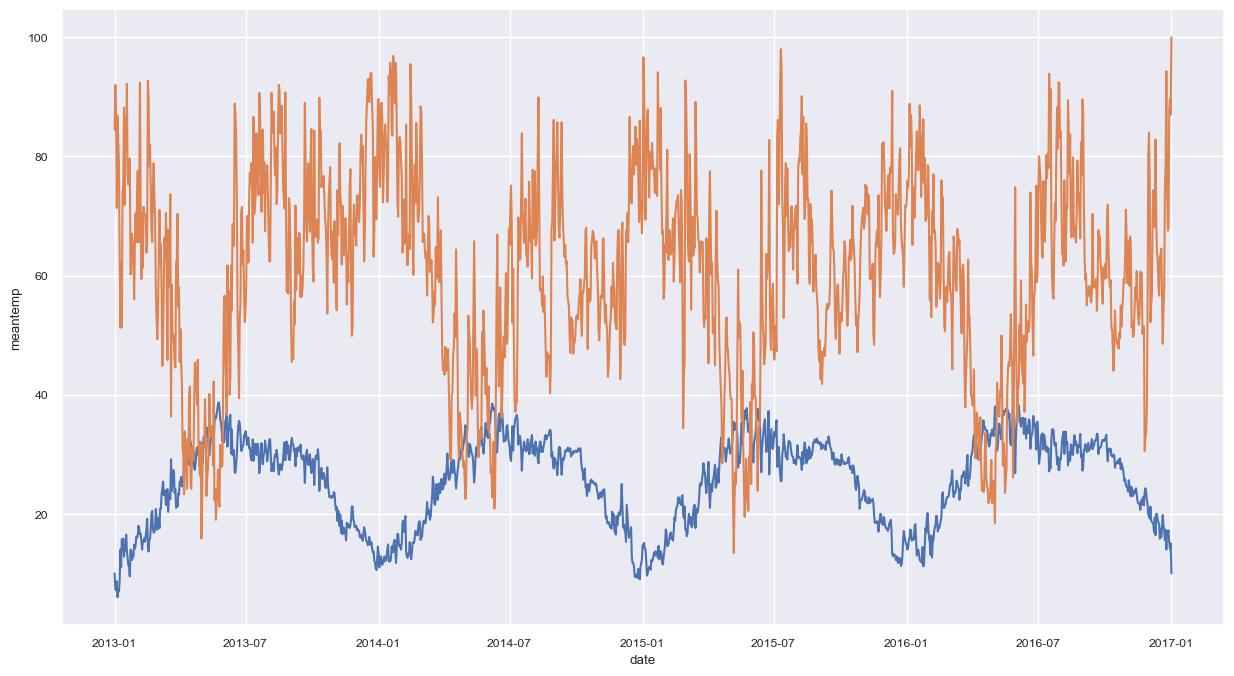

In [4]:
# draw a line plot
sns.set(rc={'figure.figsize':(15, 8)}, style='darkgrid', font_scale = 0.8)
sns.lineplot(df, x = 'date', y = 'meantemp')
sns.lineplot(df, x = 'date', y = 'humidity')
# sns.lineplot(df, x = 'date', y = 'wind_speed')

In [5]:

fig = px.line(df, x = df.index, y = 'meanpressure')
fig.show()

In [6]:
# interpolatte the outlier from the mean pressure column on the march 28, 2016
df.loc['2016-03-28', 'meanpressure'] = np.nan
df['meanpressure'] = df['meanpressure'].interpolate(method='time')
df.loc['2016-03-28']


meantemp          25.933333
humidity          52.800000
wind_speed         6.546667
meanpressure    1012.062500
Name: 2016-03-28 00:00:00, dtype: float64

In [7]:
# draw same plot on plotly
fig = px.line(df, x = df.index, y = 'meantemp', title = 'Mean Temperature')
fig_1 = px.line(df, x = df.index, y = 'humidity', title = 'Humidity')
fig_1.update_traces(line_color = 'seagreen')
fig.show()
fig_1.show()


In [8]:
# make scatter plot between a mean temperature and humidity
fig = px.scatter(df, x="meantemp", y="humidity", title='Mean Temperature vs Humidity', trendline='ols', trendline_color_override='red')
fig.show()

- Lets see the pearsonr correlation of the two variables

In [9]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['meantemp'], df['humidity'])
print('Person Correlation: ', corr)

Person Correlation:  -0.5719507155817221


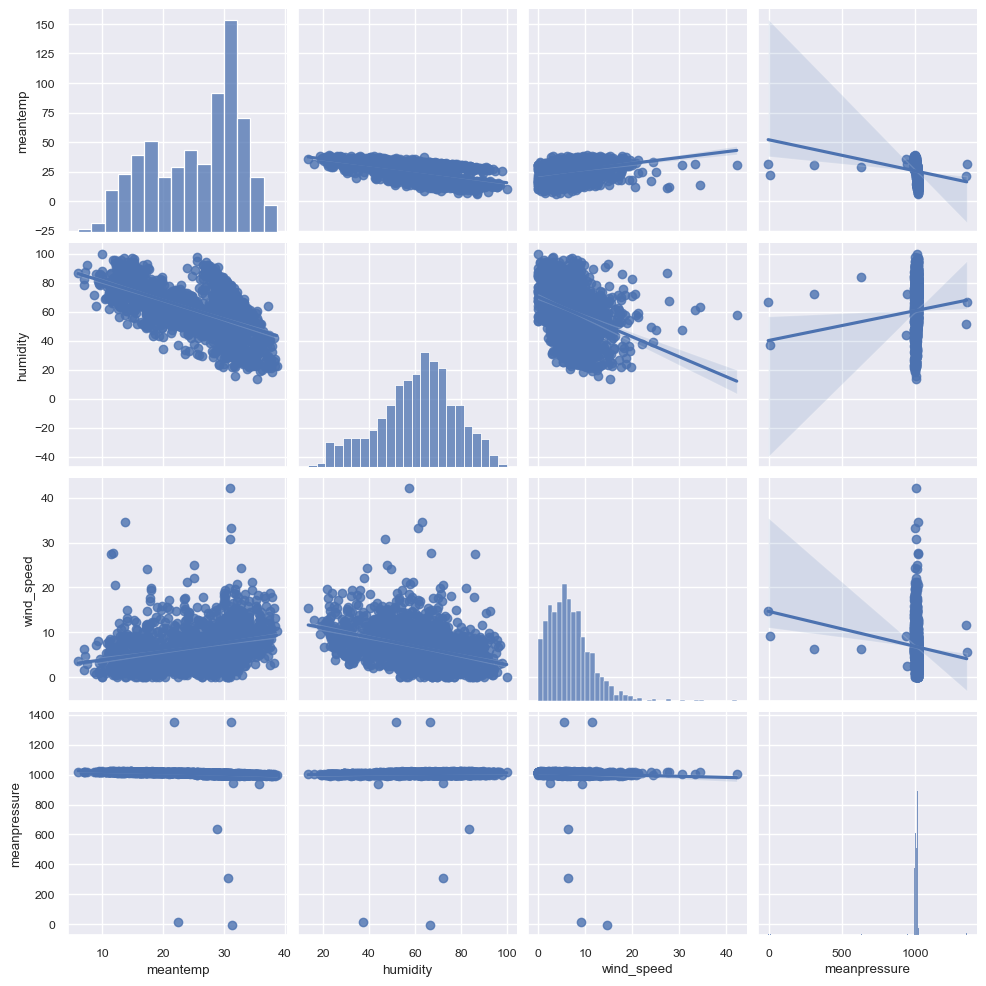

In [10]:
sns.pairplot(df, kind='reg')

- Lets See the correlation of the dataset

<Axes: >

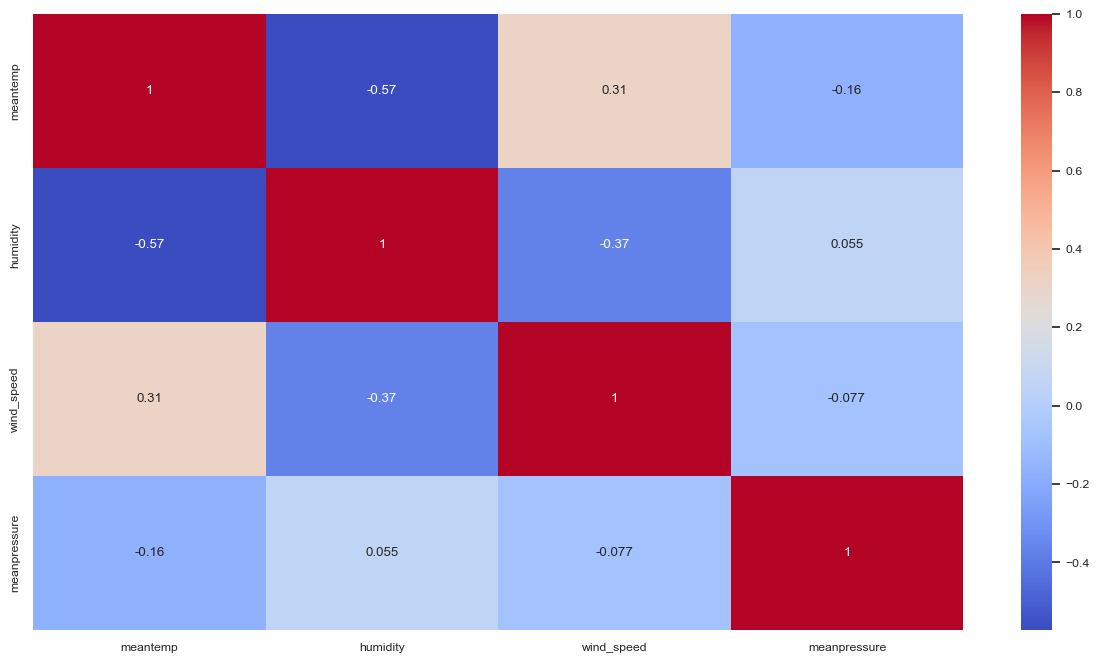

In [11]:
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

- Lets Scale the Data

In [12]:
# lets scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
# fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-1.927019e-15
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-2.242730e+01
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-1.102679e-01
50%,3.020541e-01,1.105528e-01,-1.273107e-01,4.485792e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,1.861053e-01
max,1.799551e+00,2.340044e+00,7.766988e+00,7.687749e+00


- See Correlation after the scaled df

<Axes: >

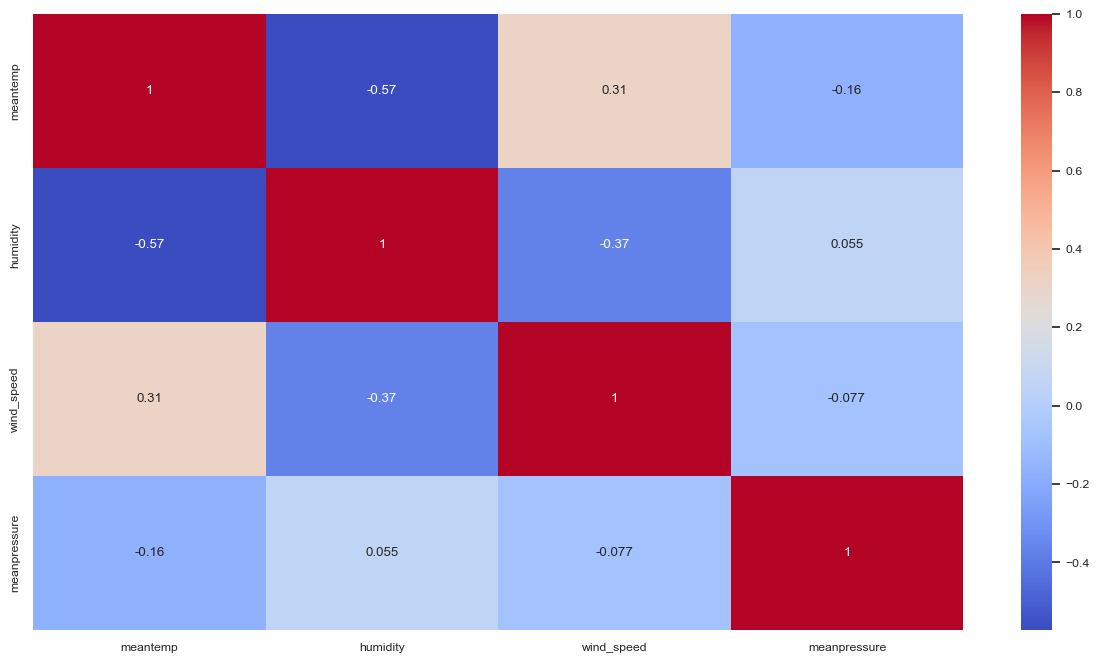

In [13]:
# make the correlation of the cale data
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='date', ylabel='meantemp'>

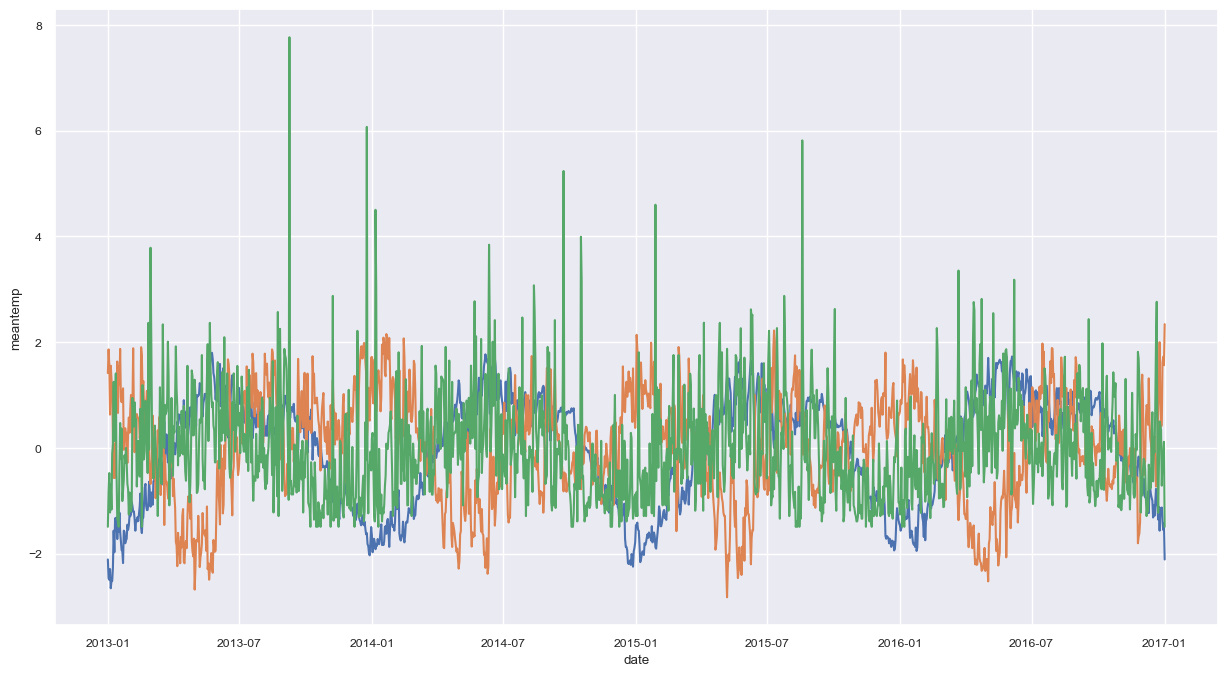

In [14]:
# draw a line plot
sns.set(rc={'figure.figsize':(15, 8)}, style='darkgrid', font_scale = 0.8)
sns.lineplot(df_scaled, x = 'date', y = 'meantemp')
sns.lineplot(df_scaled, x = 'date', y = 'humidity')
sns.lineplot(df_scaled, x = 'date', y = 'wind_speed')
# sns.lineplot(df_scaled, x = 'date', y = 'meanpressure')

- Lets add the month and year columns in the scaled df

In [15]:
df_scaled['month'] = df_scaled.index.month
df_scaled['year'] = df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.202650,1,2013
2013-01-02,-2.463454,1.862828,-0.838196,0.250041,1,2013
2013-01-03,-2.495219,1.564569,-0.475626,0.269293,1,2013
2013-01-04,-2.291015,0.630022,-1.221233,0.235972,1,2013
2013-01-05,-2.654044,1.554627,-0.680303,0.221162,1,2013


In [16]:
df_scaled.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [17]:
df_scaled.year.unique()

array([2013, 2014, 2015, 2016, 2017])

(1.0, 12.0)

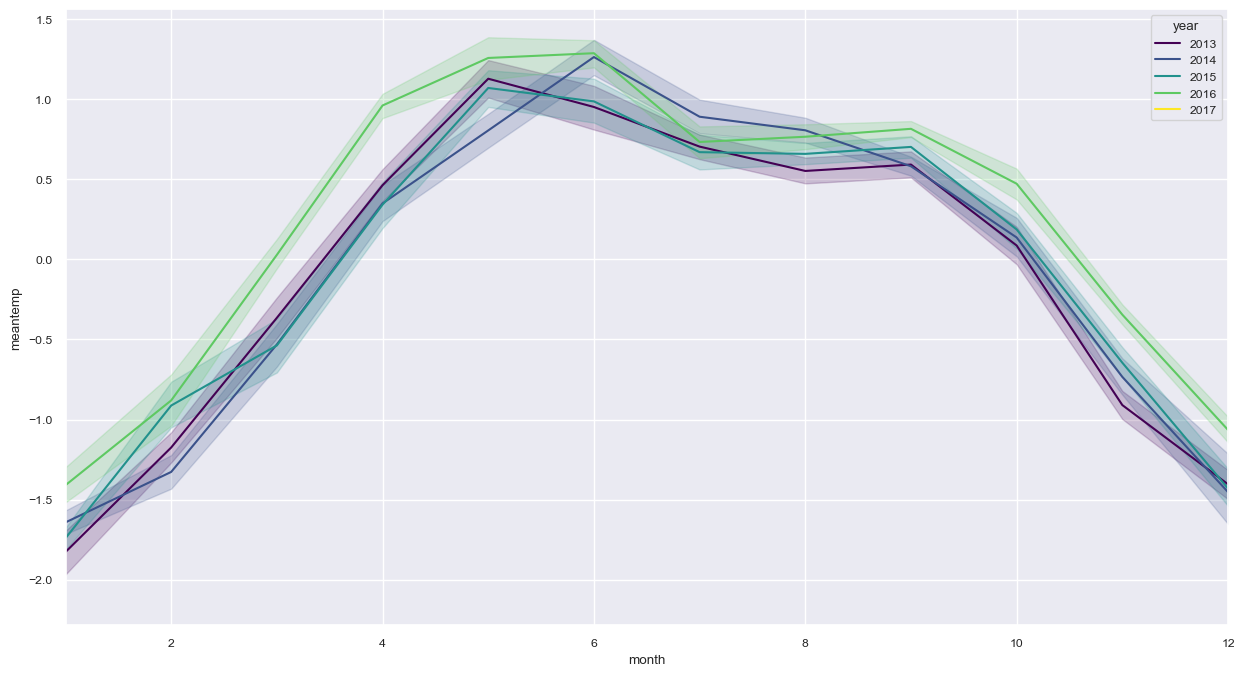

In [18]:
sns.lineplot(df_scaled, x = 'month', y = 'meantemp', hue = 'year', palette = 'viridis')
# change the x limit
plt.xlim(1, 12)

In [19]:
fig = px.line(df_scaled, x = 'month', y = 'meantemp', color = 'year', title = 'Mean Temperature by Month and Year')
fig.show()

In [20]:
fig = px.line(df_scaled, x = df_scaled.index, y = 'meantemp', color = 'year', title = 'Mean Temperature by Month')
fig.show()

In [21]:
df['month'] = df_scaled.index.month
df['year'] = df_scaled.index.year
df.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


In [22]:
fig = px.line(df, x = df.index, y = 'meantemp', color = 'year', title = 'Mean Temperature by Month')
fig.show()

## 4. Lets Use the Prophet model from python

In [23]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


In [24]:
df = pd.read_csv('DailyClimate_Train.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [25]:
# rename the columns
df = df.rename(columns={'date':'ds', 'meantemp':'y', })
df.head()

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [26]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
# call the model
model = Prophet()
model.fit(df)

forecast = model.make_future_dataframe(periods=365)
prediction = model.predict(forecast)
prediction.head()


17:52:54 - cmdstanpy - INFO - Chain [1] start processing
17:52:56 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.689997,9.204606,14.402884,24.689997,24.689997,-12.939197,-12.939197,-12.939197,0.034058,0.034058,0.034058,-12.973255,-12.973255,-12.973255,0.0,0.0,0.0,11.750800
1,2013-01-02,24.690142,9.303108,14.375815,24.690142,24.690142,-12.803590,-12.803590,-12.803590,0.146275,0.146275,0.146275,-12.949865,-12.949865,-12.949865,0.0,0.0,0.0,11.886552
2,2013-01-03,24.690287,9.280688,14.503040,24.690287,24.690287,-12.844073,-12.844073,-12.844073,0.067163,0.067163,0.067163,-12.911235,-12.911235,-12.911235,0.0,0.0,0.0,11.846214
3,2013-01-04,24.690432,9.328164,14.581365,24.690432,24.690432,-12.831776,-12.831776,-12.831776,0.027535,0.027535,0.027535,-12.859310,-12.859310,-12.859310,0.0,0.0,0.0,11.858656
4,2013-01-05,24.690577,9.357141,14.366390,24.690577,24.690577,-12.865204,-12.865204,-12.865204,-0.069124,-0.069124,-0.069124,-12.796081,-12.796081,-12.796081,0.0,0.0,0.0,11.825373


In [27]:
plot_plotly(model, prediction)